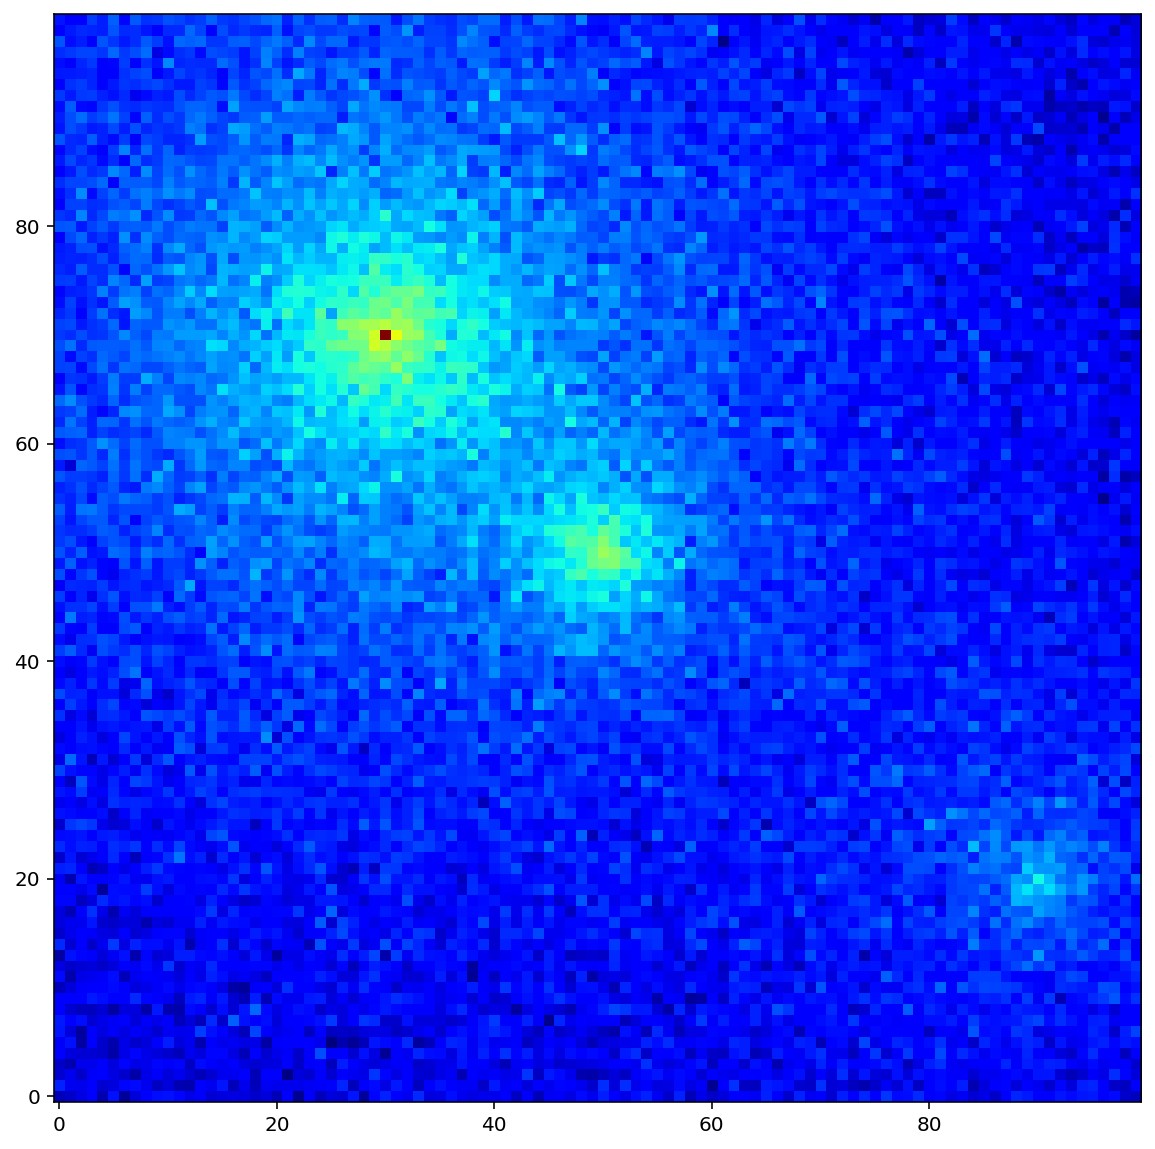

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

def sersic(filename, pixels, noise=0.0):
    # Load external file
    data = np.loadtxt(filename)
    np.save('data', data)
    data_np = np.load('data.npy')
    # Setup noise array of size pixels*pixels
    # If noise = 0, creates an array of zeros
    a = np.random.normal(0, noise, (pixels, pixels))
    # Form meshgrid of pixels
    Y, X = np.mgrid[0:pixels, 0:pixels]
    
    for entry in data_np:
        # Assign first row of values from file
        x, y, B, r0, n = entry
        # Distance of pixel (X,Y) from centre of galaxy (x,y)
        r = np.sqrt((X - x)**2 + (Y - y)**2)
        # Galaxy distribution
        galaxy = B * np.exp(-(r / r0)**(1 / n))
        # Append array a with noise + galaxy
        a += galaxy
    
    return a
import os
a = sersic(f'{os.getcwd()}/file.txt', 100, 0.1)
plt.figure(figsize = (20,10))
plt.imshow(a, origin='lower', cmap='jet')
#plt.imshow(np.fft.fft2(a), origin='lower', cmap='jet')
plt.show()